<a href="https://colab.research.google.com/github/Juzz4vijay/Deep_Learning/blob/master/Donor_choose_model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

%ls '/content/drive/My Drive/6_Donors_choose_NB/'

1_Reference_EDA.ipynb             6_Assignment_NB_Instructions.ipynb
2_Reference_Preprocessing.ipynb   glove_vectors
3_Reference_Vectorization.ipynb   preprocessed_data.csv
4_Reference_Vectorization.ipynb   resources.csv
5_Reference_SampleSolution.ipynb  train_data.csv


In [3]:
path = '/content/drive/My Drive/6_Donors_choose_NB/'

w2v = path + 'glove_vectors'
project = path + 'train_data.csv'
resources = path + 'resources.csv'
pre_processed = path + 'preprocessed_data.csv'

In [4]:
X = pd.read_csv(path + 'preprocessed_data.csv', nrows=50000)
y = X['project_is_approved']
X = X.drop(['project_is_approved'], axis=1)

print(X.shape, y.shape)

(50000, 8) (50000,)


## Vectorizing Categorical Features

In [ ]:
from sklearn.preprocessing import Normalizer

def ohe_vector(feature, dataset):
  column = str(feature) + '_vectorizer'
  out = 'X_' + feature
  column = CountVectorizer()
  column.fit(dataset[feature].values)
  print(column.get_feature_names())
  print("="*100)
  return column.transform(dataset[feature].values)

def normalized(dataset, feature):
  column = feature + "_normalizer"
  column = Normalizer()
  column.fit(dataset[feature].values.reshape(-1,1))
  return column.transform(dataset['price'].values.reshape(-1,1))

In [ ]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

essay = X['essay']

def text_features(vector_type):

  if vector_type == 'bow':
    pipe = Pipeline([('vectorizer', CountVectorizer()), ('MNB', MultinomialNB())])

  elif vector_type == 'tfidf':
    pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('MNB', MultinomialNB())])

  params = {
      'vectorizer' + '__ngram_range' : [(1,2), (1, 3), (1, 4), (1,5)],
      'vectorizer' + '__max_features' : [3000, 4000, 5000],
      'vectorizer' + '__min_df' : [10],
      'MNB' + '__class_prior' : [[0.5, 0.5]]
  }

  gsc = GridSearchCV(
          estimator = pipe,
          param_grid = params, 
          scoring = 'roc_auc', 
          verbose = 1, 
          n_jobs = -1)
  
  grid_result = gsc.fit(essay, y)

  print("\n", str(vector_type) + " : ", "\n")
  best_params = grid_result.best_params_

  print(best_params, "\n")
  print(grid_result.best_score_, "\n")

  print("#"*50, "\n\n")

for features in ['tfidf', 'bow']:
  text_features(features)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 54.6min finished



 tfidf :  

{'MNB__class_prior': [0.5, 0.5], 'vectorizer__max_features': 5000, 'vectorizer__min_df': 10, 'vectorizer__ngram_range': (1, 2)} 

0.6910019556715825 

################################################## 


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 54.2min finished



 bow :  

{'MNB__class_prior': [0.5, 0.5], 'vectorizer__max_features': 5000, 'vectorizer__min_df': 10, 'vectorizer__ngram_range': (1, 2)} 

0.6883219340434421 

################################################## 




####```NOTE:```
```

 TFIDF is the best candidate to process the text data 
 
 ```

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
import gc

school_state_ohe = ohe_vector('school_state', X).toarray()
teacher_prefix_ohe = ohe_vector('teacher_prefix',X).toarray()
project_grade_category_ohe = ohe_vector('project_grade_category', X).toarray()
clean_categories_ohe = ohe_vector('clean_categories', X).toarray()
clean_subcategories_ohe = ohe_vector('clean_subcategories', X).toarray()

price_norm = normalized(X, 'price')
no_prev_proj = normalized(X, 'teacher_number_of_previously_posted_projects')

essay = X['essay']

X_tr = np.column_stack((no_prev_proj, price_norm, school_state_ohe, teacher_prefix_ohe, project_grade_category_ohe, clean_categories_ohe, clean_subcategories_ohe))

gc.collect()

print("Final Data matrix")
print(X_tr.shape, y.shape)

print("="*100)


['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
['dr', 'mr', 'mrs', 'ms', 'teacher']
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts',

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

for features in ['tfidf']:

  def text_features(x):
    if x == 'tfidf':
      vectorizer = TfidfVectorizer(max_features = 5000, min_df = 10, ngram_range = (1, 2))
    return vectorizer.fit_transform(essay)

  data = np.column_stack((X_tr, text_features(features).toarray()))

  print(data.shape, y.shape)

  parameters = {
      'alpha' : [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100],
      'class_prior' : ['None', [0.5, 0.5]]
      }

  gsc = GridSearchCV(
          estimator = MultinomialNB(),
          param_grid = parameters, 
          scoring = 'roc_auc', 
          verbose = 1, 
          n_jobs = -1)
  
  grid_result = gsc.fit(data, y)

print("#"*50, "\n\n")

print("\n", str(features) + " : ", "\n")
best_params = grid_result.best_params_

print(best_params)
print(grid_result.best_score_, "\n")

print("#"*50, "\n\n")

del data
del y

(50000, 5101) (50000,)
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  2.7min finished


################################################## 



 tfidf :  

{'alpha': 1e-05, 'class_prior': [0.5, 0.5]}
0.6629296027793583 

################################################## 




In [5]:
import gc
gc.collect()

X = pd.read_csv(path + 'preprocessed_data.csv', nrows=50000)
y = X['project_is_approved']
X = X.drop(['project_is_approved'], axis=1)

print(X.shape, y.shape)

(50000, 8) (50000,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)

In [7]:
from sklearn.preprocessing import Normalizer

ohe = CountVectorizer()
ohe.fit(X_train['school_state'].values)
school_state_ohe_train = ohe.transform(X_train['school_state'].values).toarray() # fit has to happen only on train data
school_state_ohe_test = ohe.transform(X_test['school_state'].values).toarray()

ohe = CountVectorizer()
ohe.fit(X_train['teacher_prefix'].values)
teacher_prefix_ohe_train = ohe.transform(X_train['teacher_prefix'].values).toarray() # fit has to happen only on train data
teacher_prefix_ohe_test = ohe.transform(X_test['teacher_prefix'].values).toarray()

ohe = CountVectorizer()
ohe.fit(X_train['project_grade_category'].values)
project_grade_category_ohe_train = ohe.transform(X_train['project_grade_category'].values).toarray() # fit has to happen only on train data
project_grade_category_ohe_test = ohe.transform(X_test['project_grade_category'].values).toarray()

ohe = CountVectorizer()
ohe.fit(X_train['clean_categories'].values)
clean_categories_ohe_train = ohe.transform(X_train['clean_categories'].values).toarray() # fit has to happen only on train data
clean_categories_ohe_test = ohe.transform(X_test['clean_categories'].values).toarray()

ohe = CountVectorizer()
ohe.fit(X_train['clean_subcategories'].values)
clean_subcategories_ohe_train = ohe.transform(X_train['clean_subcategories'].values).toarray() # fit has to happen only on train data
clean_subcategories_ohe_test = ohe.transform(X_test['clean_subcategories'].values).toarray()

norm = Normalizer()
norm.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = norm.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = norm.transform(X_test['price'].values.reshape(-1,1))

norm.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_no_prev_proj = norm.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_no_prev_proj = norm.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [8]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
import gc

X_train_essay = X_train['essay']
X_test_essay = X_test['essay']

vectorizer = TfidfVectorizer(max_features = 5000, min_df = 10, ngram_range = (1, 2))

vectorizer.fit(X_train_essay)

X_train_essay = vectorizer.transform(X_train_essay).toarray()
X_test_essay = vectorizer.transform(X_test_essay).toarray()

In [9]:

X_train = np.column_stack((X_train_no_prev_proj, X_train_price_norm, school_state_ohe_train, teacher_prefix_ohe_train, project_grade_category_ohe_train, clean_categories_ohe_train, clean_subcategories_ohe_train, X_train_essay))

X_test = np.column_stack((X_test_no_prev_proj, X_test_price_norm, school_state_ohe_test, teacher_prefix_ohe_test, project_grade_category_ohe_test, clean_categories_ohe_test, clean_subcategories_ohe_test, X_test_essay))

gc.collect()

print("Final Data matrix")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

print("="*100)

Final Data matrix
(33500, 5101) (33500,)
(16500, 5101) (16500,)


In [13]:
from sklearn.metrics import roc_auc_score

model = MultinomialNB(alpha = 1e-05, class_prior = [0.5, 0.5])

model = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

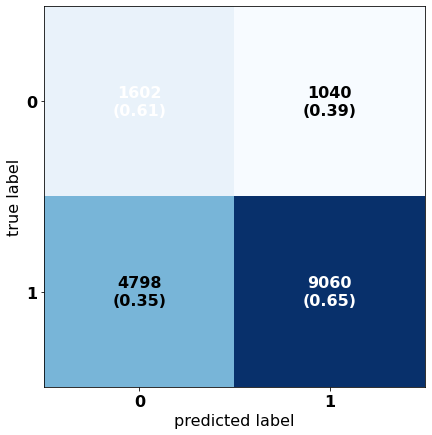

In [14]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

font = {
    'family' : 'DejaVu Sans',
    'weight' : 'bold',
    'size' : '16'
}

plt.rc('font', **font)

mat = confusion_matrix(Y_test, Y_pred)

plot_confusion_matrix(conf_mat=mat, figsize=(7,7), show_normed=True);

In [15]:
Y_train_pred = model.predict(X_train)

print(roc_auc_score(Y_train, Y_train_pred))
print(roc_auc_score(Y_test, Y_pred))

0.663869729408419
0.6300664062188464


In [31]:
print(list(np.argsort(model.feature_log_prob_[0])[::-1])[:20])

print(list(np.argsort(model.feature_log_prob_[1])[::-1])[:20])

[1, 0, 55, 66, 61, 67, 56, 58, 88, 90, 89, 64, 59, 6, 69, 97, 86, 4126, 62, 71]
[1, 0, 55, 66, 61, 67, 56, 58, 88, 90, 89, 64, 59, 6, 86, 4126, 69, 97, 62, 60]


In [51]:
print(X_train_no_prev_proj.shape, X_train_price_norm.shape, school_state_ohe_train.shape, teacher_prefix_ohe_train.shape, project_grade_category_ohe_train.shape, clean_categories_ohe_train.shape, clean_subcategories_ohe_train.shape, X_train_essay.shape)

val = [X_test_no_prev_proj.shape[1], X_test_price_norm.shape[1], school_state_ohe_test.shape[1], teacher_prefix_ohe_test.shape[1], project_grade_category_ohe_test.shape[1], clean_categories_ohe_test.shape[1], clean_subcategories_ohe_test.shape[1], X_test_essay.shape[1]]

train = {'X_train_no_prev_proj' : '[0,0]', 'X_train_price_norm' : '[0,1]', 'school_state_ohe_train' : '[2,53]', 'teacher_prefix_ohe_train' : '[54,58]', 'project_grade_category_ohe_train' : '[59,62]', 'clean_categories_ohe_train' : '[63, 71]', 'clean_subcategories_ohe_train' : '[72,101]', 'X_train_essay' : '[102:5101]'}


(33500, 1) (33500, 1) (33500, 51) (33500, 5) (33500, 4) (33500, 9) (33500, 30) (33500, 5000)


In [67]:
print('columns : ', list(train.keys())) 

print('ranges : ', list(train.values()))

columns :  ['X_train_no_prev_proj', 'X_train_price_norm', 'school_state_ohe_train', 'teacher_prefix_ohe_train', 'project_grade_category_ohe_train', 'clean_categories_ohe_train', 'clean_subcategories_ohe_train', 'X_train_essay']
ranges :  ['[0,0]', '[0,1]', '[2,53]', '[54,58]', '[59,62]', '[63, 71]', '[72,101]', '[102:5101]']


```
### TOP 20 NEGATIVE CLASS PROB Features

1 : 'X_test_price_norm',
0 : 'X_train_no_prev_proj',
55 : 'teacher_prefix_ohe_train',
66 : 'clean_categories_ohe_train',
61 : 'project_grade_category_ohe_train',
67 : 'clean_categories_ohe_train',
58 : 'teacher_prefix_ohe_train',
88 : 'clean_subcategories_ohe_train',
90 : 'clean_subcategories_ohe_train',
89 : 'clean_subcategories_ohe_train',
64 : 'clean_categories_ohe_train',
59 : 'project_grade_category_ohe_train',
6 : 'school_state_ohe_train',
69 : 'clean_categories_ohe_train',
97 : 'clean_subcategories_ohe_train',
86 : 'clean_subcategories_ohe_train',
4126 : 'X_train_essay',
62 : 'project_grade_category_ohe_train',
71 : 'clean_subcategories_ohe_train'
```


```
### TOP 20 POSITIVE CLASS PROB Features

1 : 'X_test_price_norm',
0 : 'X_train_no_prev_proj',
55 : 'teacher_prefix_ohe_train',
66 : 'clean_categories_ohe_train',
61 : 'project_grade_category_ohe_train',
67 : 'clean_categories_ohe_train',
58 : 'teacher_prefix_ohe_train',
88 : 'clean_subcategories_ohe_train',
90 : 'clean_subcategories_ohe_train',
89 : 'clean_subcategories_ohe_train',
64 : 'clean_categories_ohe_train',
59 : 'project_grade_category_ohe_train',
6 : 'school_state_ohe_train',
86 : 'clean_subcategories_ohe_train',
4126 : 'X_train_essay',
69 : 'clean_categories_ohe_train',
97 : 'clean_subcategories_ohe_train',
62 : 'project_grade_category_ohe_train',
71 : 'clean_subcategories_ohe_train'
60 : 'project_grade_category_ohe_train
```

